In [1]:
import sys
sys.path.append('../../utils/')

In [2]:
from Bias_Variance_Estimator import estimate_bias_variance_mse

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
import torch.optim as optim

In [5]:
import torchvision
from torchvision import datasets,transforms

In [6]:
class SinusoidNetwork(nn.Module):
    def __init__(self,input_dim,hidden_units):
        super(SinusoidNetwork,self).__init__()
        self.net= nn.Sequential(
            nn.Linear(input_dim,hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units,1)
        )
    def forward(self,x):
        return self.net(x)

In [7]:
def generate_sinusoid_data(num_samples:int,noise_scale:float=0.3):
    X = np.linspace(-1,1,num_samples).reshape(-1, 1)
    y_true = np.sin(2 * np.pi * X)                       # shape: (num_samples, 1)
    noise = np.random.normal(0, noise_scale, size=(num_samples, 1))#random gaussian noise
    y = y_true + noise
    return X,y

In [8]:
NUM_TRAIN_SAMPLES = 1000
NUM_TEST_SAMPLES = 5000
BOOTSTRAP_NUMS = 30
MAX_EPOCHS = 1000
PATIENCE = 1000
LEARNING_RATE=0.001
hidden_unit_sizes =[8,16,32,64,128,256,512,1024]

In [9]:
X_train,y_train = generate_sinusoid_data(num_samples=NUM_TRAIN_SAMPLES)
X_test,y_test = generate_sinusoid_data(num_samples=NUM_TEST_SAMPLES,noise_scale=0)


In [11]:
results = []
for hidden_units in hidden_unit_sizes:
    print(f"---Training with {hidden_units} hidden units----")
    bias_sq,variance,total_error,error_sum,avg_train_loss,test_loss= estimate_bias_variance_mse(
            model_class=SinusoidNetwork,
            X_train=X_train,
            y_train=y_train,
            X_test=X_test,
            y_test=y_test,
            loss_fn=nn.MSELoss(),
            model_kwargs={'input_dim':X_train.shape[1],"hidden_units":hidden_units},
            num_models=30,
            max_epochs=MAX_EPOCHS,
            patience=PATIENCE,
            lr=LEARNING_RATE,
            batch_size=64,
        )
    results.append({
        'hidden_units': hidden_units,
        'bias_sq': bias_sq,
        'variance': variance,
        'total_error': total_error,
        'error_sum': error_sum,
        'avg_train_loss':avg_train_loss,
        'test_loss':test_loss
    })

---Training with 8 hidden units----
Starting experiment with 30 models...

--- Training Model 1/30 ---

--- Training Model 2/30 ---

--- Training Model 3/30 ---

--- Training Model 4/30 ---

--- Training Model 5/30 ---

--- Training Model 6/30 ---

--- Training Model 7/30 ---

--- Training Model 8/30 ---

--- Training Model 9/30 ---

--- Training Model 10/30 ---

--- Training Model 11/30 ---

--- Training Model 12/30 ---

--- Training Model 13/30 ---

--- Training Model 14/30 ---

--- Training Model 15/30 ---

--- Training Model 16/30 ---

--- Training Model 17/30 ---

--- Training Model 18/30 ---

--- Training Model 19/30 ---

--- Training Model 20/30 ---

--- Training Model 21/30 ---

--- Training Model 22/30 ---

--- Training Model 23/30 ---

--- Training Model 24/30 ---

--- Training Model 25/30 ---

--- Training Model 26/30 ---

--- Training Model 27/30 ---

--- Training Model 28/30 ---

--- Training Model 29/30 ---

--- Training Model 30/30 ---

--- Final Results ---
Bias²:    0.

In [11]:
results

[{'hidden_units': 1,
  'bias_sq': np.float64(0.43675652984655583),
  'variance': np.float32(0.027164634),
  'total_error': np.float64(0.4639211644630095),
  'error_sum': np.float64(0.4639211641637155),
  'avg_train_loss': np.float64(0.6613796699355046)},
 {'hidden_units': 8,
  'bias_sq': np.float64(0.33611654673645563),
  'variance': np.float32(0.013811187),
  'total_error': np.float64(0.3499277350031599),
  'error_sum': np.float64(0.3499277336237795),
  'avg_train_loss': np.float64(0.49622292380432287)},
 {'hidden_units': 16,
  'bias_sq': np.float64(0.2382384141064049),
  'variance': np.float32(0.018282387),
  'total_error': np.float64(0.25652080207562633),
  'error_sum': np.float64(0.2565208015120388),
  'avg_train_loss': np.float64(0.4438334792902072)},
 {'hidden_units': 64,
  'bias_sq': np.float64(0.04872691613744352),
  'variance': np.float32(0.01054653),
  'total_error': np.float64(0.05927344624354215),
  'error_sum': np.float64(0.05927344580303285),
  'avg_train_loss': np.float6

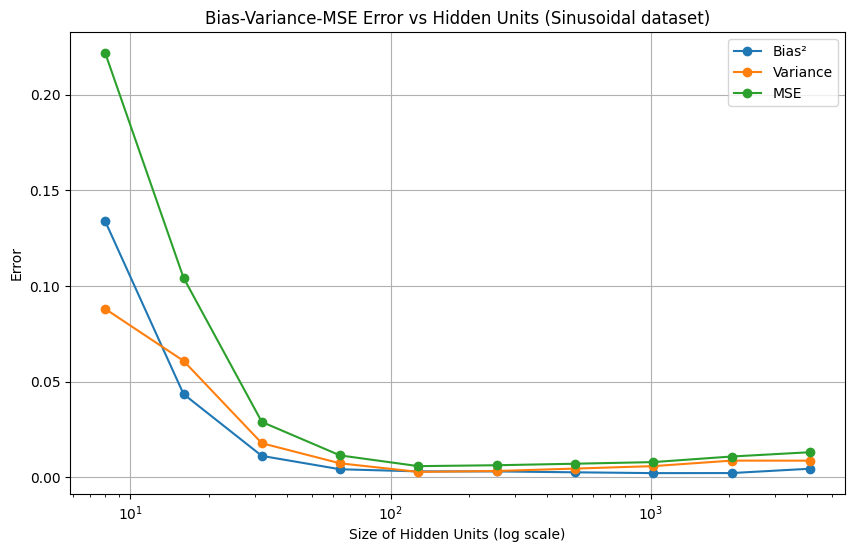

In [25]:
hidden_unit_sizes=[8,16,32,64,128,256,512,1024,2048,4096]
bias_sq = [r['bias_sq'] for r in results]
variance = [r['variance'] for r in results]
total_error = [r['total_error'] for r in results]
avg_train_loss = [r['avg_train_loss'] for r in results]

# --- Plot 1: Bias, Variance, Total Error ---
plt.figure(figsize=(10, 6))
plt.plot(hidden_unit_sizes, bias_sq, marker='o', label='Bias²')
plt.plot(hidden_unit_sizes, variance, marker='o', label='Variance')
plt.plot(hidden_unit_sizes, total_error, marker='o', label='MSE')
plt.xscale('log')  # Log scale for hidden units
plt.xlabel('Size of Hidden Units (log scale)')
plt.ylabel('Error')
plt.title('Bias-Variance-MSE Error vs Hidden Units (Sinusoidal dataset)')
plt.legend()
plt.grid(True)
plt.show()

Text(0, 0.5, 'Variance')

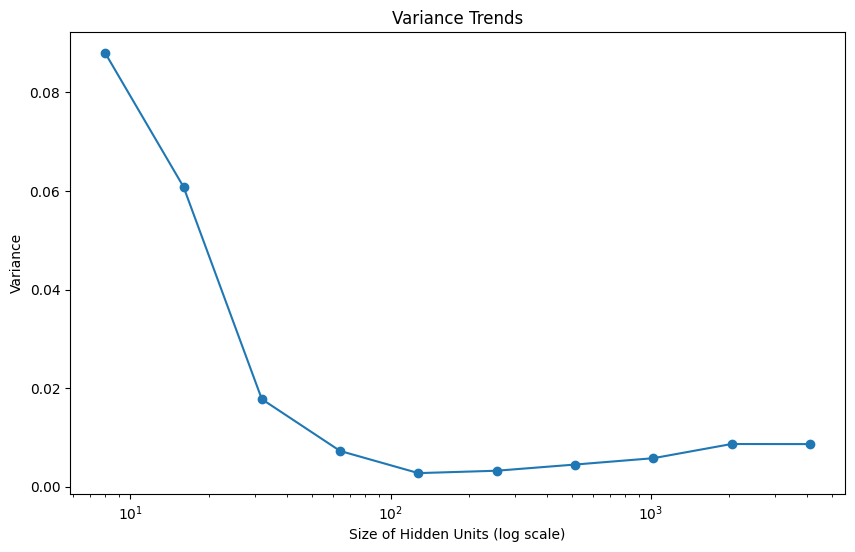

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(hidden_unit_sizes, variance, marker='o', label='Variance')
plt.title('Variance Trends')
plt.xscale('log')  # Log scale for hidden units
plt.xlabel('Size of Hidden Units (log scale)')
plt.ylabel('Variance')

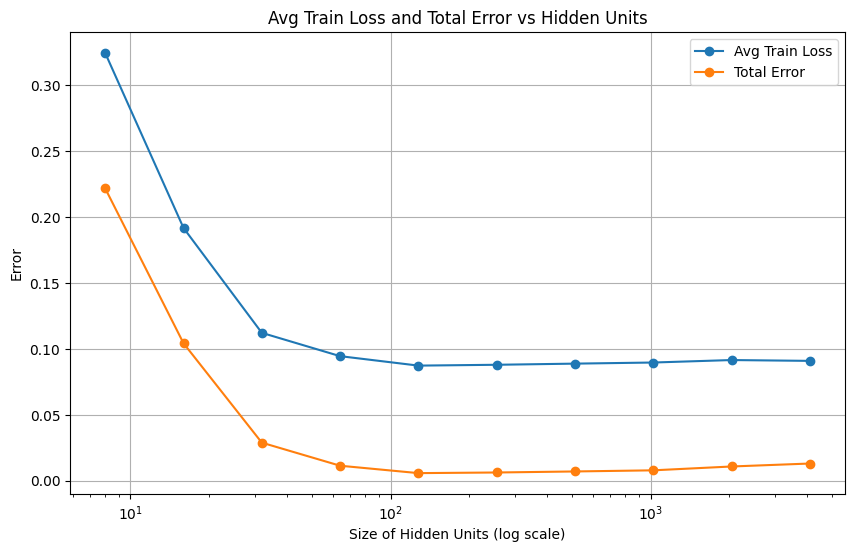

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(hidden_unit_sizes, avg_train_loss, marker='o', label='Avg Train Loss')
plt.plot(hidden_unit_sizes, total_error, marker='o', label='Total Error')
plt.xscale('log')  # Log scale for hidden units
plt.xlabel('Size of Hidden Units (log scale)')
plt.ylabel('Error')
plt.title('Avg Train Loss and Total Error vs Hidden Units')
plt.legend()
plt.grid(True)
plt.show()

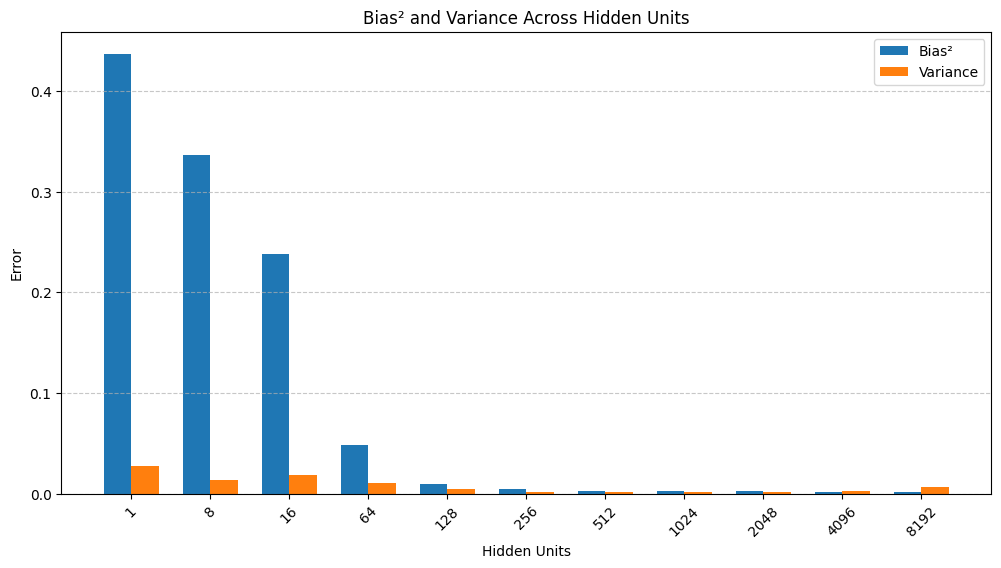

In [18]:
bias_sq = [r['bias_sq'] for r in results]
variance = [r['variance'] for r in results]


x = np.arange(len(hidden_unit_sizes))  
width = 0.35  
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, bias_sq, width, label='Bias²')
plt.bar(x + width/2, variance, width, label='Variance')


plt.xticks(x, hidden_unit_sizes, rotation=45)
plt.xlabel('Hidden Units')
plt.ylabel('Error')
plt.title('Bias² and Variance Across Hidden Units')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

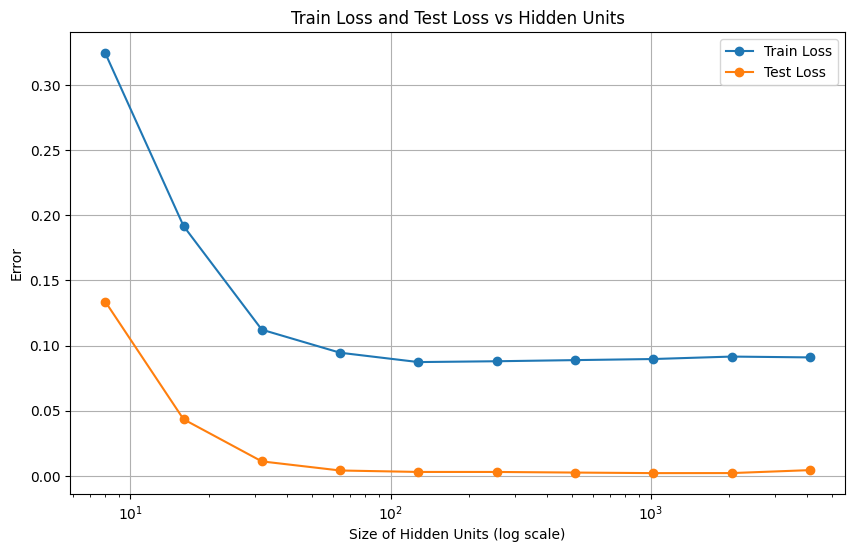

In [28]:
test_loss = [r['test_loss'] for r in results]
plt.figure(figsize=(10, 6))
plt.plot(hidden_unit_sizes, avg_train_loss, marker='o', label='Train Loss')
plt.plot(hidden_unit_sizes, test_loss, marker='o', label='Test Loss')
plt.xscale('log')  # Log scale for hidden units
plt.xlabel('Size of Hidden Units (log scale)')
plt.ylabel('Error')
plt.title('Train Loss and Test Loss vs Hidden Units')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
hidden_unit_sizes=[2048,4096]
for hidden_units in hidden_unit_sizes:
    print(f"---Training with {hidden_units} hidden units----")
    bias_sq,variance,total_error,error_sum,avg_train_loss,test_loss= estimate_bias_variance_mse(
            model_class=SinusoidNetwork,
            X_train=X_train,
            y_train=y_train,
            X_test=X_test,
            y_test=y_test,
            loss_fn=nn.MSELoss(),
            model_kwargs={'input_dim':X_train.shape[1],"hidden_units":hidden_units},
            num_models=30,
            max_epochs=MAX_EPOCHS,
            patience=PATIENCE,
            lr=LEARNING_RATE,
            batch_size=64,
        )
    results.append({
        'hidden_units': hidden_units,
        'bias_sq': bias_sq,
        'variance': variance,
        'total_error': total_error,
        'error_sum': error_sum,
        'avg_train_loss':avg_train_loss,
        'test_loss':test_loss
    })

---Training with 2048 hidden units----
Starting experiment with 30 models...

--- Training Model 1/30 ---

--- Training Model 2/30 ---

--- Training Model 3/30 ---

--- Training Model 4/30 ---

--- Training Model 5/30 ---

--- Training Model 6/30 ---

--- Training Model 7/30 ---

--- Training Model 8/30 ---

--- Training Model 9/30 ---

--- Training Model 10/30 ---

--- Training Model 11/30 ---

--- Training Model 12/30 ---

--- Training Model 13/30 ---

--- Training Model 14/30 ---

--- Training Model 15/30 ---

--- Training Model 16/30 ---

--- Training Model 17/30 ---

--- Training Model 18/30 ---

--- Training Model 19/30 ---

--- Training Model 20/30 ---

--- Training Model 21/30 ---

--- Training Model 22/30 ---

--- Training Model 23/30 ---

--- Training Model 24/30 ---

--- Training Model 25/30 ---

--- Training Model 26/30 ---

--- Training Model 27/30 ---

--- Training Model 28/30 ---

--- Training Model 29/30 ---

--- Training Model 30/30 ---

--- Final Results ---
Bias²:   

In [19]:
results

[{'hidden_units': 8,
  'bias_sq': np.float64(0.1337595030364704),
  'variance': np.float32(0.087968335),
  'total_error': np.float64(0.22172783719014535),
  'error_sum': np.float64(0.22172783759209633),
  'avg_train_loss': np.float64(0.32445000459750495),
  'test_loss': np.float64(0.1337595030364704)},
 {'hidden_units': 16,
  'bias_sq': np.float64(0.04344281123393271),
  'variance': np.float32(0.060822535),
  'total_error': np.float64(0.10426534802418995),
  'error_sum': np.float64(0.10426534654014799),
  'avg_train_loss': np.float64(0.1917699878414472),
  'test_loss': np.float64(0.04344281123393271)},
 {'hidden_units': 32,
  'bias_sq': np.float64(0.011120914630568645),
  'variance': np.float32(0.017751828),
  'total_error': np.float64(0.028872742452373423),
  'error_sum': np.float64(0.028872742466605327),
  'avg_train_loss': np.float64(0.1122019407649835),
  'test_loss': np.float64(0.011120914630568645)},
 {'hidden_units': 64,
  'bias_sq': np.float64(0.004134302928954853),
  'variance